# Fraction of connections unidentified
- Queries our lamina connectome for a list of all connections (also called 'links' in catmaid) to the number of those with unidentified postsynaptic partners. 
- The list of unknowns is broken down by ommatidia and displayed in a retinotopic heatmap. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cx_analysis.vis.hex_lattice import hexplot
from cx_analysis.vis.fig_tools import hex_to_rgb, linear_cmap

In [9]:
plt.rcdefaults()
plt.style.use('../cx_analysis/vis/lamina.mplstyle')

In [10]:
tp = '210809'
data_path = "Data/"
#cx = pd.read_pickle(data_path + "_cxdf.pickle")
links = pd.read_pickle(data_path + "210809_linkdf.pickle")
display(len(links))
display(len(links.cx_id.unique()))

20779

3072

19536

## Number of synaptic inputs received by each subtype

In [11]:
input_counts = links.groupby('post_type')['link_id'].nunique()  

In [18]:
display(input_counts)
display(f"total: {len(links)}")
display(f"total identified {len(links) - input_counts['UNKNOWN']}")

post_type
LMC_1        3999
LMC_2        4990
LMC_3        3177
LMC_4        1841
LMC_N         132
R7            305
R7p          1359
R8            590
R_duet       1075
R_quartet     196
UNKNOWN      1243
centri       1872
Name: link_id, dtype: int64

'total: 20779'

'total identified 19536'

In [6]:
p_unknown = dict()
n_unknown = dict()
n_syn = dict()
n_term = dict()

for om, l in links.groupby('pre_om'):
    unknown_count = (l['post_type'] == 'UNKNOWN').sum()
    percent = float(unknown_count)/float(len(l['link_id']))

    # make sure each link ID is unique 
    assert(len(l['link_id'].unique()) == len(l['link_id']))
    n_term[om] = l['cx_id'].nunique()
    n_syn[om] = l['link_id'].nunique()
    p_unknown[om] = percent
    n_unknown[om] = unknown_count
    
    
    n_pr_outputs = len([pre for pre in l['pre_type'] if pre[0] == 'R']) 


In [7]:
om_summary = pd.DataFrame(data={'n_syn': n_syn, 
                                'n_unknown':n_unknown, 
                                'n_term': n_term, 
                                'n_pr_outputs': n_pr_outputs})
om_summary['n_known'] = om_summary['n_syn'] - om_summary['n_unknown']
om_summary

,n_syn,n_unknown,n_term,n_pr_outputs,n_known
A0,734,69,107,437,665
A1,724,24,109,437,700
A2,517,33,89,437,484
A3,778,5,111,437,773
A4,720,32,111,437,688
A5,627,25,95,437,602
B0,746,51,111,437,695
B1,858,120,118,437,738
B2,728,66,101,437,662
B3,628,18,98,437,610


In [8]:
om_summary.describe()

,n_syn,n_unknown,n_term,n_pr_outputs,n_known
count,29.000000,29.000000,29.000000,29.0,29.000000
mean,716.517241,42.862069,105.931034,437.0,673.655172
std,79.802265,29.482106,9.610006,0.0,69.234217
min,517.000000,5.000000,85.000000,437.0,484.000000
25%,658.000000,24.000000,100.000000,437.0,633.000000
50%,728.000000,33.000000,107.000000,437.0,684.000000
75%,765.000000,57.000000,114.000000,437.0,713.000000
max,889.000000,120.000000,120.000000,437.0,807.000000


NameError: name 'om_summary' is not defined

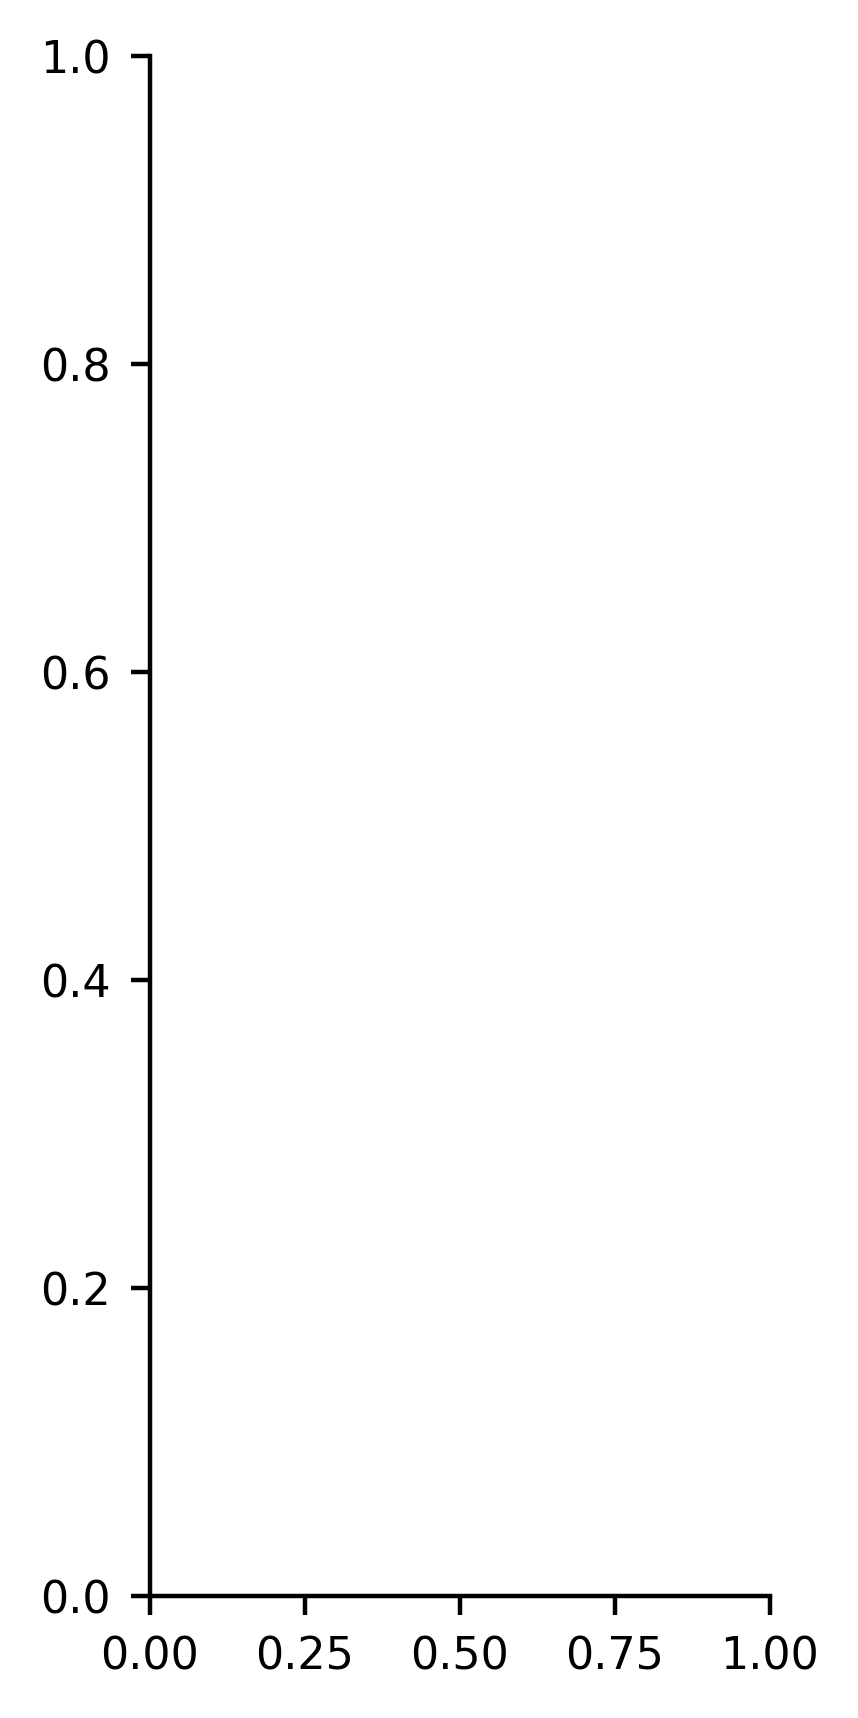

In [14]:
fig, ax = plt.subplots(1, figsize=[2, 5])
cm = linear_cmap(n_vals=100, max_colour='#a83232', min_colour='#ffffff')
high = om_summary['n_syn'].max()

hex_data = {om: {'colour': cm(v/high),
                 'label': f'{v: .0f}'} for om, v in om_summary['n_syn'].items()}
ax.set_title(f"Total number of synaptic contacts\n" + 
            f"mean = {om_summary['n_syn'].mean(): .1f}\n" + 
            f"SD = {om_summary['n_syn'].std(ddof=0): .1f}")

hexplot(hex_data, ax=ax)
plt.show()

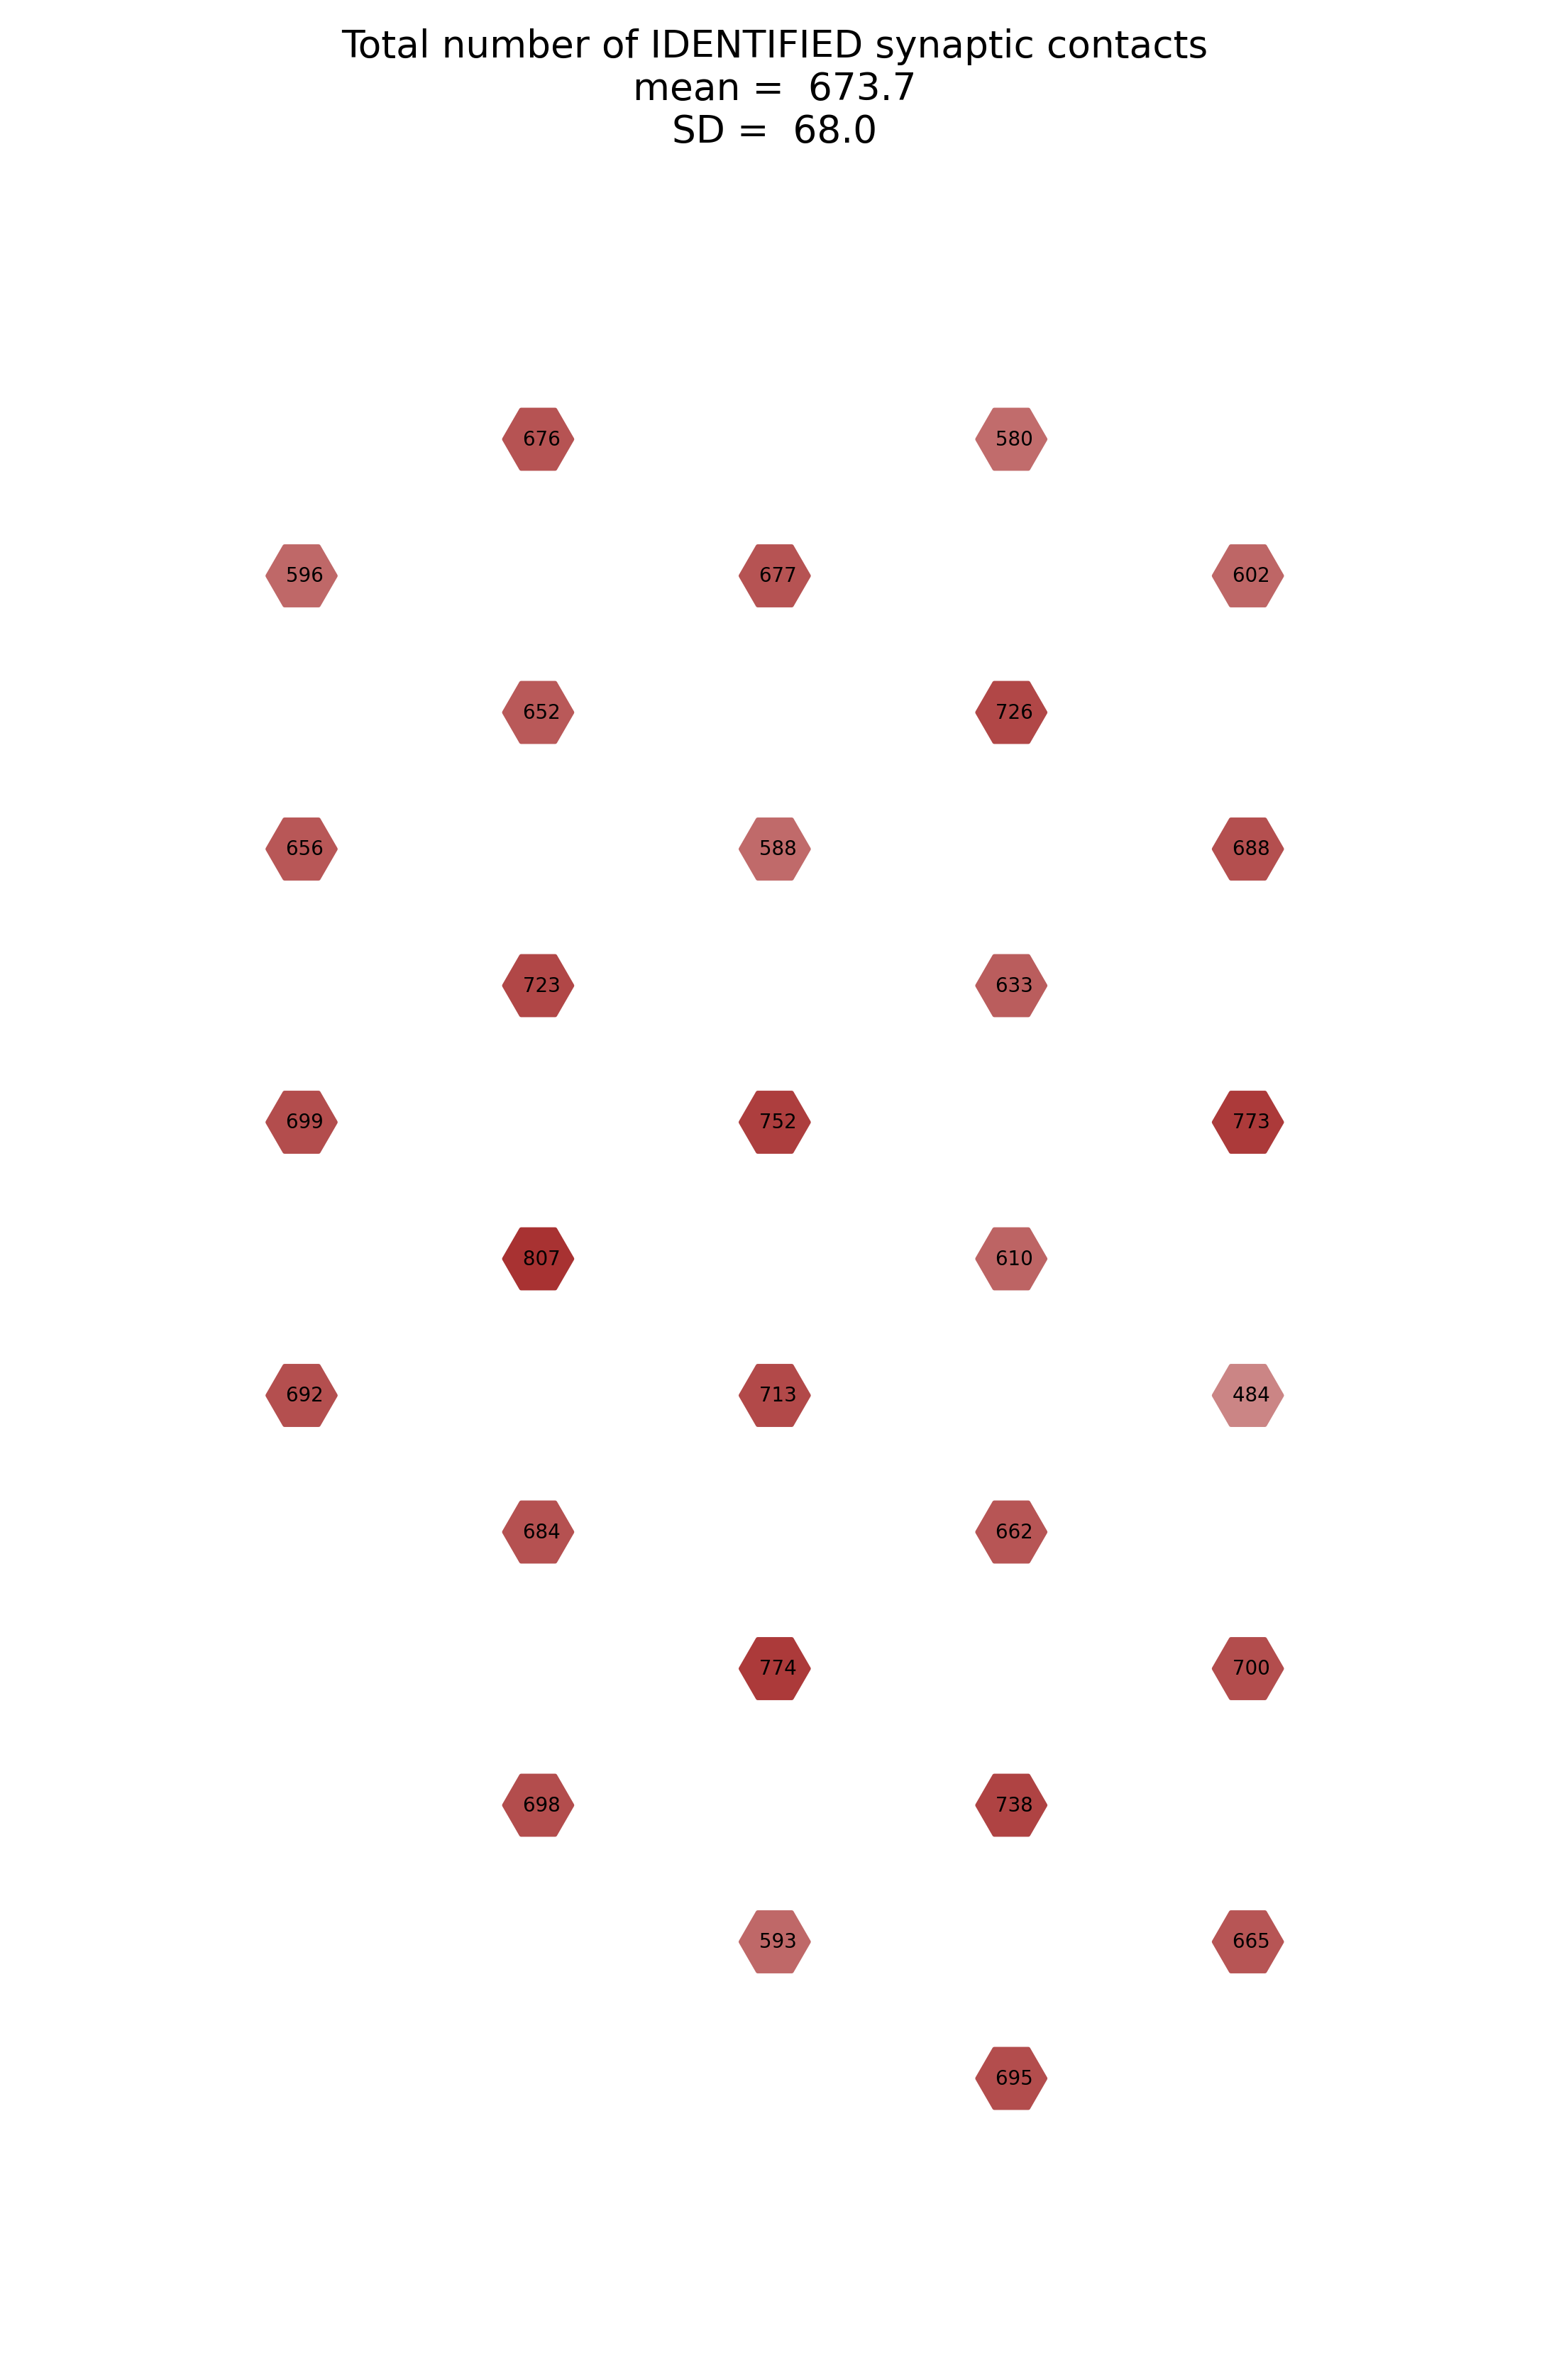

In [10]:
fig, ax = plt.subplots(1, figsize=[8, 10])
cm = linear_cmap(n_vals=100, max_colour='#a83232', min_colour='#ffffff')
high = om_summary['n_known'].max()

hex_data = {om: {'colour': cm(v/high),
                 'label': f'{v: .0f}'} for om, v in om_summary['n_known'].items()}
ax.set_title(f"Total number of IDENTIFIED synaptic contacts\n" + 
            f"mean = {om_summary['n_known'].mean(): .1f}\n" + 
            f"SD = {om_summary['n_known'].std(ddof=0): .1f}")

hexplot(hex_data, ax=ax)
plt.show()

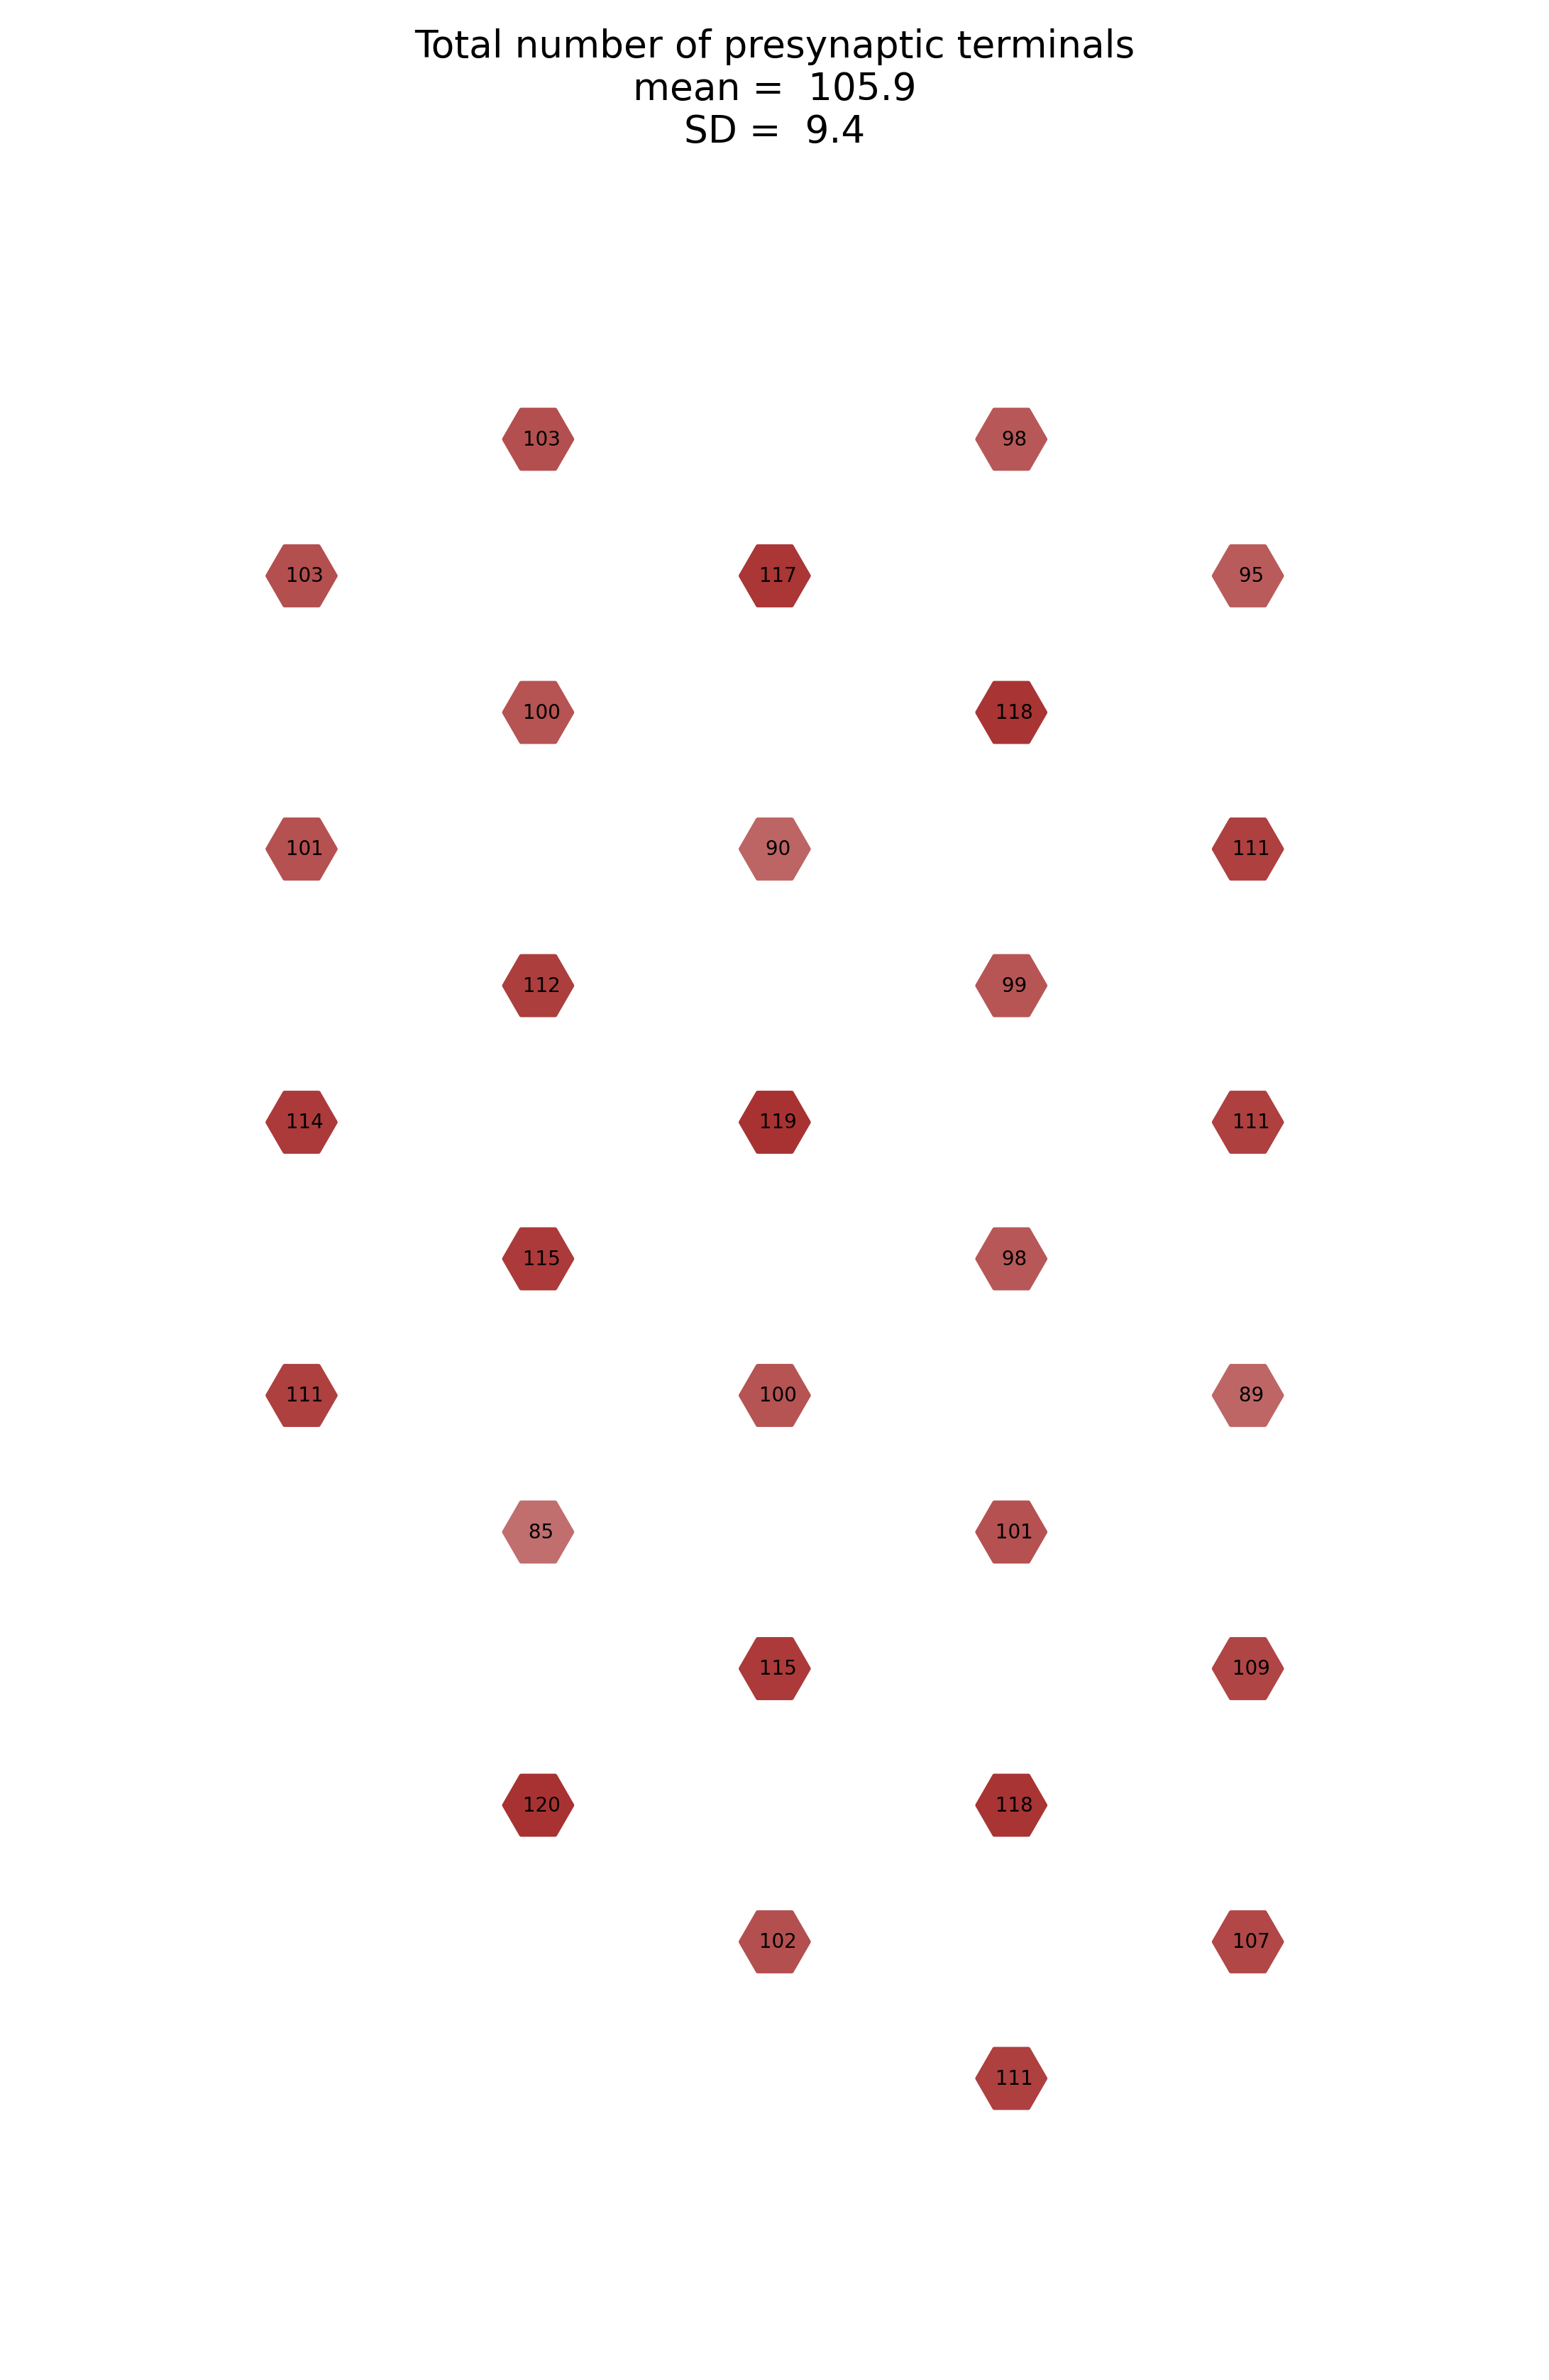

In [11]:
fig, ax = plt.subplots(1, figsize=[8, 10])
cm = linear_cmap(n_vals=100, max_colour='#a83232', min_colour='#ffffff')
high = om_summary['n_term'].max()

hex_data = {om: {'colour': cm(v/high),
                 'label': f'{v: .0f}'} for om, v in om_summary['n_term'].items()}
ax.set_title(f"Total number of presynaptic terminals\n" + 
            f"mean = {om_summary['n_term'].mean(): .1f}\n" + 
            f"SD = {om_summary['n_term'].std(ddof=0): .1f}")

hexplot(hex_data, ax=ax)
plt.show()

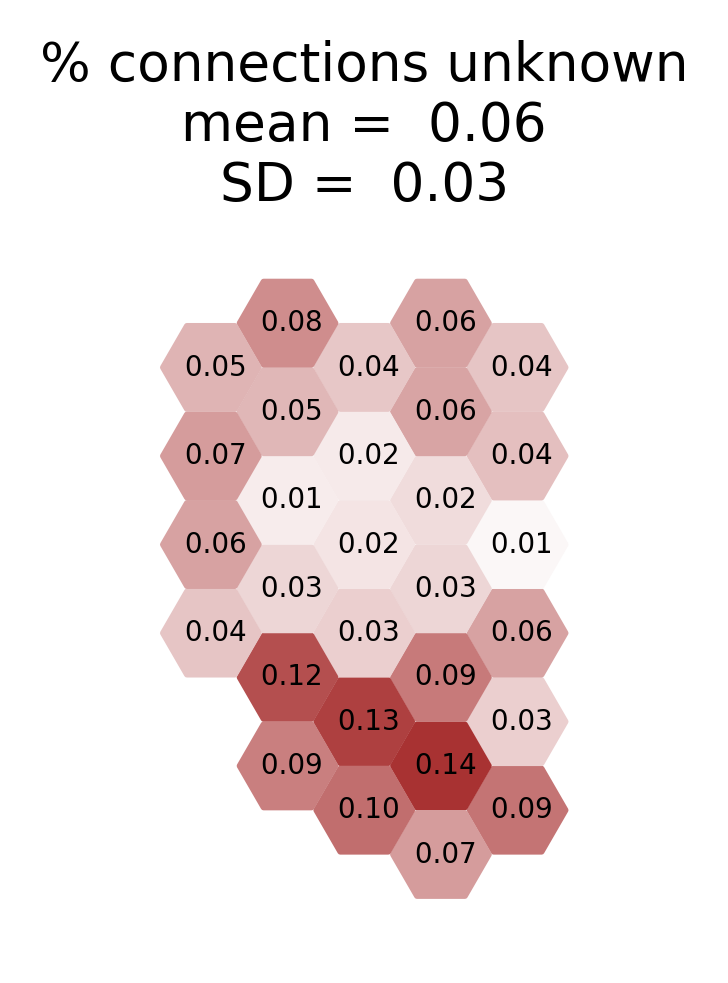

In [12]:
fig, ax = plt.subplots(1)
high = max(list(p_unknown.values()))

hex_data = {om: {'colour': cm(v/high),
                 'label': f'{v: .2f}'} for om, v in p_unknown.items()}

ax.set_title(f"% connections unknown\n" + 
            f"mean = {np.mean(list(p_unknown.values())): .2f}\n" + 
            f"SD = {np.std(list(p_unknown.values()), ddof=0): .2f}")
hexplot(hex_data, ax=ax)
plt.show()
